In [2]:
import pandas as pd
import glob
from datetime import datetime
import re
import numpy as np
import math

We combine the csv files into one dataframe and export it as a file using the code below

In [3]:
#combining csv files into one dataframe

folderDir = "/Users/CheHoon/Desktop/Class101DataFinal"

df = pd.DataFrame()

files = glob.glob(f"{folderDir}/*.csv")

for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

    
todayDate = "20210611"
df.to_csv(f"/Users/CheHoon/Desktop/Class101DataFinal/class101_{todayDate}.csv")
    

We clean the data using R Studio instead for convenience (Refer to R File).

We import the clean data into this notebook for analysis.

In [6]:
classdf = pd.read_excel("/Users/CheHoon/Desktop/Class101DataFinal/Class101Data.xlsx")
socialdf = pd.read_excel("/Users/CheHoon/Desktop/Class101DataFinal/Class101CreatorSocialMedia.xlsx")

In [8]:
classdf.head()

,className,category,topic,level,duration,chapters,lessons,startDate,subtitles,creatorName,...,originalPrice,discountAmount,couponDiscount,finalPrice,installmentPeriodInMonths,discountPct,monthlyPayment,coupon,referenceDate,classURL
0,"월간키키 1호 : 몸도 튼튼, 마음도 튼튼",아동교육,NaN,NaN,12주 수강 가능,0.0,0.0,바로 수강 가능,False,클래스101 키즈,...,162550.0,63550.0,NaN,99000.0,NaN,39.0,NaN,NaN,2021-06-10,https://class101.net/products/TCFyXX6He5cWP3xL...
1,"직접 만들며 배우는 코딩, 나만의 장난감 5개 만들기!",아동교육,피지컬 코딩 / 아두이노,입문자,21주 수강 가능,6.0,27.0,바로 수강 가능,False,ACIA 김수연,...,388300.0,68800.0,NaN,NaN,5.0,17.0,63900.0,NaN,2021-06-10,https://class101.net/products/SXP7pjCrXulA9fQS...
2,"""로봇은 어떻게 움직여요?"" 아이 질문에 페이퍼토이로 답해주기",아동교육,로봇 하드웨어/소프트웨어 교육,입문자,20주 수강 가능,13.0,30.0,바로 수강 가능,True,로보트리,...,309400.0,79900.0,NaN,NaN,5.0,25.0,45900.0,NaN,2021-06-10,https://class101.net/products/xXZcIpnsa4zaGato...
3,아이의 미래를 바꾼다! 주식으로 이해하는 어린이 경제 클래스,아동교육,NaN,NaN,12주 수강 가능,NaN,NaN,NaN,NaN,NaN,...,69000.0,10000.0,NaN,59000.0,NaN,14.0,NaN,NaN,2021-06-10,https://class101.net/products/yWb00UZQ5AP2NkPl...
4,재료 선정부터 디지털 포스터까지! : 곤충을 테마로 탐구하는 진짜 융합 미술,아동교육,NaN,NaN,20주 수강 가능,8.0,29.0,21.07.06 (화),False,Re:a 레아,...,280000.0,110700.0,10000.0,159300.0,5.0,43.0,31860.0,NaN,2021-06-10,https://class101.net/products/ezwV5FutQUK2CCEs...


In [7]:
socialdf.head()

,creatorName,creatorSocialMedia
0,[대박땅꾼] 전은규,https://www.youtube.com/channel/UCoyA-0efbgYY7...
1,125,http://instagram.com/125_yu.nim
2,12DOSTUDIO(세시),https://instagram.com/3am_sesi
3,14일,https://instagram.com/14.day
4,1억치트키,https://cafe.naver.com/akqjatk12


We perform exploratory data analysis below.

# Analysis

## Questions

1. Is there a relationship between feedbacks and likes?
2. Is there a relationship between likes and prices?
3. What kind of coupon may be preferred?
4. What kind of classes (category, topic, etc.) are "popular"
5. What difficulty have more likes?
6. Youtube vs instagram?

In [29]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
df = classdf.copy()

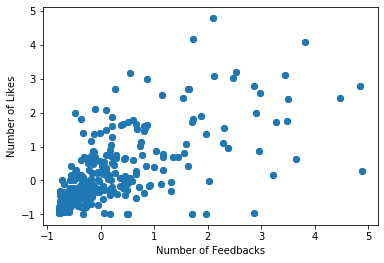

In [33]:
feedback_df = df.loc[df['feedbackNum'].notnull(),]

feedbackNum = feedback_df['feedbackNum']
likes = feedback_df['likes']

feedbackNum = feedbackNum.values.reshape(-1,1)
likes = likes.values.reshape(-1,1)

ss = StandardScaler()
ss.fit(feedbackNum)
feedbackNumScaled = ss.transform(feedbackNum)
ss.fit(likes)
likesScaled = ss.transform(likes)


#m, b = np.polyfit(feedbackNumScaled,likesScaled, 1)

plt.scatter(feedbackNumScaled,likesScaled)
#plt.plot(feedbackNumScaled, m*feedbackNumScaled + b,'r')
plt.xlabel("Number of Feedbacks")
plt.ylabel("Number of Likes")
plt.show()

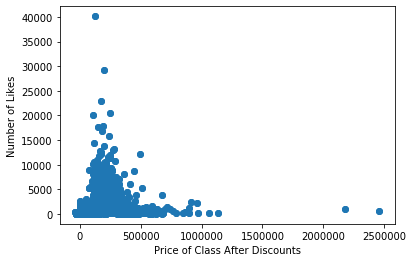

In [28]:
price_df = df.loc[df['finalPrice'].notnull() & df['finalPrice']>=0,]

#m, b = np.polyfit(price_df['finalPrice'],price_df['likes'], 1)

plt.scatter(price_df['finalPrice'],price_df['likes'])
#plt.plot(price_df['finalPrice'], m*price_df['finalPrice'] + b,'r')
plt.xlabel("Price of Class After Discounts")
plt.ylabel("Number of Likes")
plt.show()

In [122]:
dfs = df.copy()
dfs = dfs.drop([1795, 1916,2334,3254,3375,3793],axis=0)

df.loc[df['originalPrice'] < df['discountAmount']]

,className,category,topic,level,duration,chapters,lessons,startDate,subtitles,creatorName,...,originalPrice,discountAmount,couponDiscount,finalPrice,installmentPeriodInMonths,discountPct,monthlyPayment,coupon,referenceDate,classURL
1795,[클래스101 튜토리얼] 코바늘이 처음인 당신을 위해,코바늘뜨개,코바늘,입문자,48주 수강 가능,4.0,10.0,바로 수강 가능,False,클래스101,...,12601.0,40000.0,NaN,-27399.0,NaN,317.0,NaN,NaN,2021-06-09,https://class101.net/products/tq0f5N51oXsFgwVU...
1916,[클래스101 튜토리얼] 대바늘이 처음인 당신을 위해,대바늘뜨개,대바늘,입문자,48주 수강 가능,4.0,9.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/DMqhqLv0AHfby3UW...
2334,[클래스101 튜토리얼] 프랑스자수가 처음인 당신을 위해,실공예,프랑스자수,입문자,48주 수강 가능,4.0,6.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/dTZOgJBN00KZrOrb...
3254,[클래스101 튜토리얼] 코바늘이 처음인 당신을 위해,코바늘뜨개,코바늘,입문자,48주 수강 가능,4.0,10.0,바로 수강 가능,False,클래스101,...,12601.0,40000.0,NaN,-27399.0,NaN,317.0,NaN,NaN,2021-06-09,https://class101.net/products/tq0f5N51oXsFgwVU...
3375,[클래스101 튜토리얼] 대바늘이 처음인 당신을 위해,대바늘뜨개,대바늘,입문자,48주 수강 가능,4.0,9.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/DMqhqLv0AHfby3UW...
3793,[클래스101 튜토리얼] 프랑스자수가 처음인 당신을 위해,실공예,프랑스자수,입문자,48주 수강 가능,4.0,6.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/dTZOgJBN00KZrOrb...


In [128]:
category = []

for row in dfs['monthlyPayment'].iteritems():
    if row[1] < 10000:
        category.append('0만원대')
    elif row[1] < 20000:
        category.append("1만원대")
    elif row[1] < 30000:
        category.append("2만원대")
    elif row[1] < 40000:
        category.append("3만원대")
    elif row[1] < 50000:
        category.append("4만원대")
    elif row[1] < 60000:
        category.append("5만원대")
    elif row[1] < 70000:
        category.append("6만원대")
    elif row[1] < 80000:
        category.append("7만원대")
    elif row[1] < 90000:
        category.append("8만원대")
    elif row[1] < 100000:
        category.append("9만원대")
    elif row[1] < 200000:
        category.append("10만원대")
    else:
        category.append("20만원대 이상")

dfs['priceCategory'] = category
dfsGroup = dfs.groupby('priceCategory').agg({'likes':['mean', 'median'], 'satisfactionPct':['mean','median']}) 
dfsGroup = dfsGroup.reset_index()
dfsGroup


priceCategory        likes         satisfactionPct       
                         mean  median            mean median
0           0만원대   269.000000   269.0             NaN    NaN
1          10만원대   841.714286   907.0       96.200000   95.0
2           1만원대  1262.767857   437.0       95.434783   98.0
3       20만원대 이상   203.234694    47.0       95.787500   97.0
4           2만원대  1948.991549   884.0       96.102804   97.0
5           3만원대  2102.210016  1169.0       96.572581   98.0
6           4만원대  2195.400000  1215.0       97.003922   98.0
7           5만원대  1792.602804   907.5       96.933333   98.0
8           6만원대  1309.949153   873.0       97.878378   99.0
9           7만원대  1551.516129  1015.5       97.432432   98.0
10          8만원대  1636.705882  1183.0       97.571429   99.0
11          9만원대  2136.777778   845.0       98.833333   99.0

In [38]:
couponList = {}

for element in df['coupon']:
    
    if element not in couponList:
        
        couponList[element] = 1
    
    else:
        couponList[element] = couponList[element] + 1

couponList

{nan: 620,
 '매진': 40,
 '오늘 출발': 10,
 '3만원 쿠폰': 2262,
 '5만원 쿠폰': 706,
 '준비물0원': 108,
 '6만원 쿠폰': 44,
 '9만원 쿠폰': 40,
 '10만원 쿠폰': 42,
 '1개월 무제한': 92,
 '7만원 쿠폰': 48,
 '8만원 쿠폰': 36,
 '4만원 쿠폰': 96,
 '준비물 무료': 2,
 '11만원 쿠폰': 2,
 '타블렛 증정': 2,
 '작업파일 제공': 2,
 '20만원 쿠폰': 2,
 'LIVE': 2,
 '101일 도전': 10}

In [43]:
couponGroup = df.groupby('coupon')
couponGroup.agg({'likes':['mean','median'], 'satisfactionPct':['mean','median']})



likes         satisfactionPct       
                mean  median            mean median
coupon                                             
101일 도전    94.200000    85.0             NaN    NaN
10만원 쿠폰  2726.350000  1438.5       96.888889   97.0
11만원 쿠폰  6710.000000  6710.0       97.000000   97.0
1개월 무제한    32.046512    27.0       94.666667   96.0
20만원 쿠폰          NaN     NaN             NaN    NaN
3만원 쿠폰   1554.579839   922.0       96.358548   97.0
4만원 쿠폰   2769.291667  1556.5       97.435897   98.0
5만원 쿠폰   3331.521739  1986.0       97.254545   98.0
6만원 쿠폰   4010.181818  2048.0       97.947368   98.0
7만원 쿠폰   3017.200000  1428.0       96.588235   97.0
8만원 쿠폰   2432.777778  1275.0       97.916667   98.5
9만원 쿠폰   1720.800000  1179.0       96.066667   97.0
LIVE       51.000000    51.0             NaN    NaN
매진         50.400000    47.0             NaN    NaN
오늘 출발     371.800000   101.0       98.000000   98.0
작업파일 제공  2388.000000  2388.0             NaN    NaN
준비물 무료   9878.000000  9878.0       97.000000   97.0
준비물0원    4104.222222  2271.5       97.458333   98.5
타블렛 증정   3453.000000  3453.0             NaN    NaN

In [134]:
youtubeCount = 0
instagramCount = 0

for row in socialdf['creatorSocialMedia'].iteritems():
    if "youtube" in row[1]:
        youtubeCount += 1
    if "instagram" in row[1]:
        instagramCount += 1
    
print("youtube: ", youtubeCount)
print("instagram: ", instagramCount)

youtube:  603
instagram:  1310
